In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('forest_fire_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
1,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
2,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
3,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
4,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [6]:
df['Classes'].value_counts()

fire        137
not fire    105
Name: Classes, dtype: int64

In [7]:
# Data Encoding
df['Classes']= np.where(df['Classes'].str.contains('not fire'),0,1)

In [8]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
238,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
239,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
240,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
241,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [9]:
# Independent feature and dependent feature
X= df.drop('FWI',axis=1)
y=df['FWI']

In [10]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
1,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
2,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
3,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
4,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,1,0


In [11]:
y.head()

0    0.4
1    0.1
2    0.0
3    0.5
4    2.5
Name: FWI, dtype: float64

In [12]:
# Test Train split_)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=43)

In [13]:
X_train.shape, X_test.shape

((181, 11), (61, 11))

In [14]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.649212,-0.306610,-0.342352,0.696418,0.488493,0.354112,0.596025,0.452688,0.517945,0.312217
RH,-0.649212,1.000000,0.293068,0.225081,-0.643462,-0.377754,-0.183621,-0.665517,-0.316867,-0.410319,-0.442479
Ws,-0.306610,0.293068,1.000000,0.194909,-0.206781,-0.027777,0.047542,-0.016645,0.002729,-0.094631,-0.185698
Rain,-0.342352,0.225081,0.194909,1.000000,-0.565765,-0.276526,-0.290184,-0.339609,-0.289291,-0.371202,-0.048390
FFMC,0.696418,-0.643462,-0.206781,-0.565765,1.000000,0.587338,0.484830,0.735891,0.574606,0.768698,0.217936
DMC,0.488493,-0.377754,-0.027777,-0.276526,0.587338,1.000000,0.873449,0.666582,0.981337,0.551722,0.222566
DC,0.354112,-0.183621,0.047542,-0.290184,0.484830,0.873449,1.000000,0.481225,0.939215,0.456461,-0.064581
ISI,0.596025,-0.665517,-0.016645,-0.339609,0.735891,0.666582,0.481225,1.000000,0.626557,0.727365,0.283707
BUI,0.452688,-0.316867,0.002729,-0.289291,0.574606,0.981337,0.939215,0.626557,1.000000,0.547901,0.114476
Classes,0.517945,-0.410319,-0.094631,-0.371202,0.768698,0.551722,0.456461,0.727365,0.547901,1.000000,0.141156


#### Lets check multicollinearity- ( If two or more than two independent features are approx 95% collinear with each other then instead using all those features we use one feature as they are 95%(here this value is threshold value) collinear that's how feature selection is done. )

<AxesSubplot: >

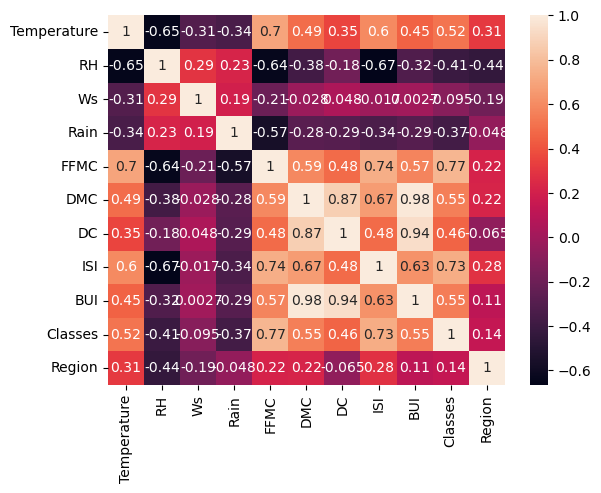

In [15]:
## multicollinearity
corr= X_train.corr()
sns.heatmap(corr,annot=True)

In [16]:
def correlation(dataset, threshold):
    col_corr= set()
    corr_matrix= dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [17]:
corr_feature=correlation(X_train,0.85)

In [18]:
corr_feature

{'BUI', 'DC'}

In [19]:
X_train.drop(corr_feature,axis=1,inplace=True)
X_test.drop(corr_feature, axis=1, inplace= True)
X_train.shape,X_test.shape

((181, 9), (61, 9))

## Featur Scaling or Standardization

In [20]:
from sklearn.preprocessing import StandardScaler

In [48]:
STscaler= StandardScaler()

In [49]:
X_train_scaled= STscaler.fit_transform(X_train)
X_test_scaled= STscaler.transform(X_test)

In [23]:
X_train_scaled

array([[ 1.03515991, -0.59254393,  0.20340534, ...,  1.40684086,
         0.84115823, -0.99449032],
       [-0.60120641,  0.1685883 , -0.47837923, ..., -0.64246055,
        -1.18883697,  1.00554021],
       [ 0.48970447, -1.14609464,  0.88518991, ...,  1.63176418,
         0.84115823,  1.00554021],
       ...,
       [ 0.21697675,  0.58375134,  0.54429763, ...,  0.10728387,
         0.84115823, -0.99449032],
       [ 0.48970447,  0.23778214, -0.81927151, ...,  0.10728387,
         0.84115823, -0.99449032],
       [ 0.76243219, -0.17738089,  0.54429763, ...,  0.53213904,
         0.84115823, -0.99449032]])

## Box Plots to understand the effect of standard scaler

/tmp/ipykernel_77/70787582.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)
/tmp/ipykernel_77/70787582.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


<AxesSubplot: >

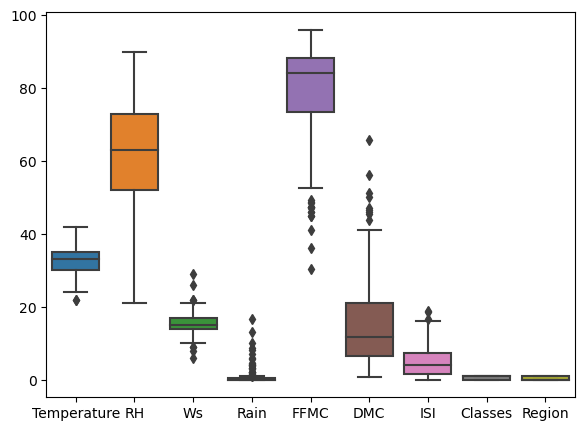

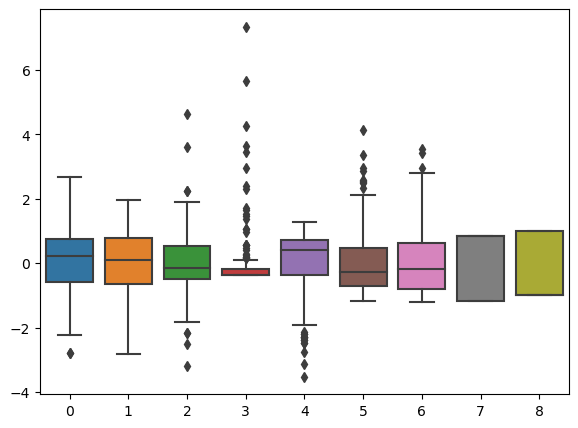

In [24]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.subplots(figsize=(15,5))
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)

## Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
linreg= LinearRegression()

In [30]:
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)

In [31]:
from sklearn.metrics import mean_absolute_error, r2_score

In [32]:
mae=mean_absolute_error(y_test, y_pred)
score= r2_score(y_test, y_pred)
print('Mean absolute error',mae)
print('R2 Score',score)

Mean absolute error 0.709354342865637
R2 Score 0.9862344751727082


## Lasso Regression

In [34]:
from sklearn.linear_model import Lasso

In [36]:
lasso= Lasso()
lasso.fit(X_train_scaled,y_train)
y_predl= lasso.predict(X_test_scaled)
meal= mean_absolute_error(y_test, y_predl)
scorel= r2_score(y_test, y_predl)
print('Mean absolute error',meal)
print('R2 Score',scorel)

Mean absolute error 1.2987190801901696
R2 Score 0.9489078933419415


## Ridge Regression Model

In [37]:
from sklearn.linear_model import Ridge

In [40]:
ridge= Ridge()
ridge.fit(X_train_scaled,y_train)

Ridge()

In [41]:
y_predr= ridge.predict(X_test_scaled)
mear= mean_absolute_error(y_test, y_predr)
scorer= r2_score(y_test, y_predr)
print('Mean absolute error',mear)
print('R2 Score',scorer)

Mean absolute error 0.7184658694990539
R2 Score 0.9858179648017553


## Elasticnet Regression

In [43]:
from sklearn.linear_model import ElasticNet

In [44]:
elsn= ElasticNet()

In [46]:
elsn.fit(X_train_scaled,y_train)
y_prede=elsn.predict(X_test_scaled)
meae= mean_absolute_error(y_test, y_prede)
scoree= r2_score(y_test,y_prede)
print('Mean absolute error',meae)
print('R2 Score',scoree)

Mean absolute error 1.9255765404545686
R2 Score 0.8876188827500988


## therefor classical Linear Regression is giving better r2 Scores

### Now generating pickle file

In [ ]:
import pickle
pickle.dump(STscaler,open(